# Delivery

$\large{Описание\: данных\: {\color{Purple}{experiment.csv}}:}$

* <span style="color:green"><b>order_id</b></span> – id заказа
* <span style="color:green"><b>delivery_time</b></span> – время доставки в минутах
* <span style="color:green"><b>district</b></span> – район доставки
* <span style="color:green"><b>experiment_group</b></span> – экспериментальная группа

## Задание

Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
# Задаем настройки

from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 10)
sns.set_theme(style="darkgrid")
sns.set_palette('deep')

In [3]:
delivery = pd.read_csv('experiment.csv')

In [4]:
delivery.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [9]:
delivery.experiment_group.unique()

array(['control', 'test'], dtype=object)

In [12]:
delivery.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

## I Построить распределение времени доставки по группам и районам

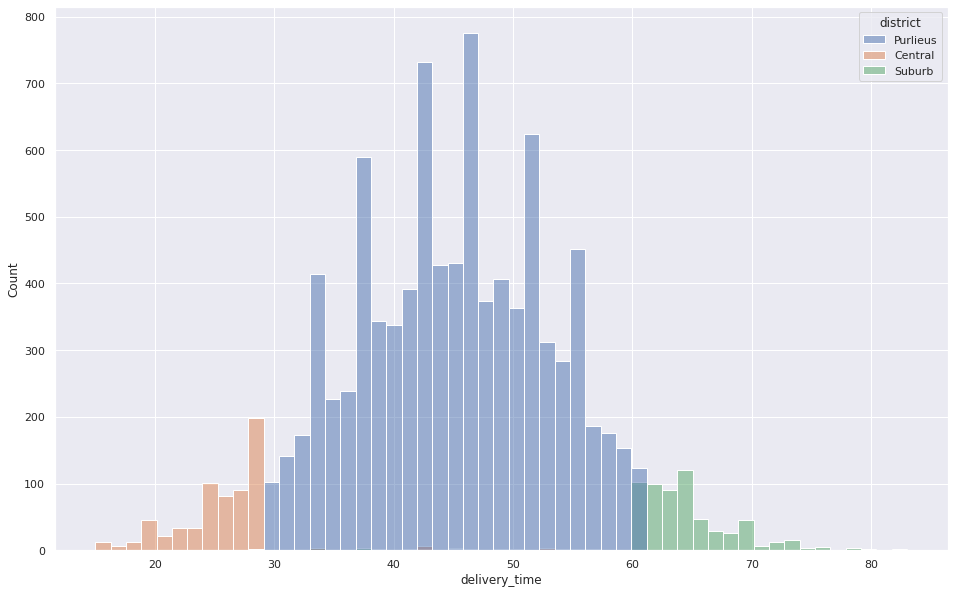

In [8]:
sns.histplot(data=delivery.query('experiment_group == "control"'), x='delivery_time', hue='district')

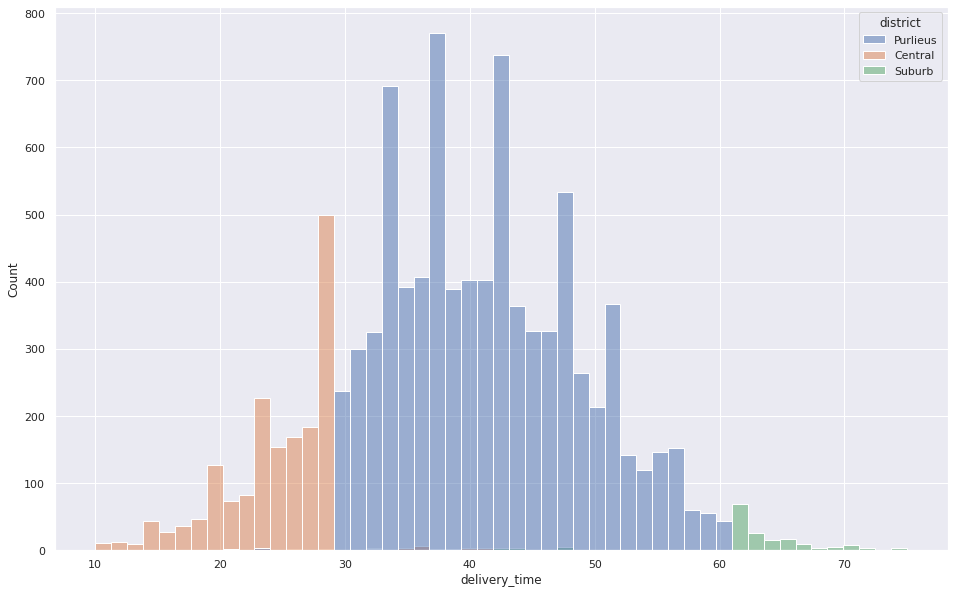

In [10]:
sns.histplot(data=delivery.query('experiment_group == "test"'), x='delivery_time', hue='district')

## II Посчитать количество наблюдений в тестовой и контрольной группе

In [16]:
delivery.groupby('experiment_group') \
        .agg({'order_id': 'count'}) \
        .rename(columns={'order_id': 'number_of_observations'})

,number_of_observations
experiment_group,
control,10092
test,10104


In [17]:
10104 - 10092

12

## III Проверить выполнение условий на нормальность и посчитать стандартное отклонение в тесте и в контроле

In [21]:
random_test = delivery[delivery['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
random_control = delivery[delivery['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [19]:
sp.stats.shapiro(random_test)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [22]:
sp.stats.shapiro(random_control)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [20]:
np.std(delivery[delivery['experiment_group'] == 'test']['delivery_time'])

9.882819260031342

In [23]:
np.std(delivery[delivery['experiment_group'] == 'control']['delivery_time'])

9.989522000652327

## IV Сравнить средние в тесте и контроле

In [26]:
sp.stats.ttest_ind(delivery[delivery['experiment_group'] == 'test']['delivery_time'],
                   delivery[delivery['experiment_group'] == 'control']['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

## V На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлить до сотых)? 

In [31]:
100 * (
np.mean(delivery[delivery['experiment_group'] == 'test']['delivery_time']) -
np.mean(delivery[delivery['experiment_group'] == 'control']['delivery_time'])
) / np.mean(delivery[delivery['experiment_group'] == 'control']['delivery_time'])

-13.354653121660812